<a href="https://colab.research.google.com/github/Robertvaswegen/COS801/blob/main/SPC_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
from google.colab import drive

# Step 1: Mount Google Drive
drive.mount('/content/drive')

# Create a folder in your Google Drive to save the images
output_folder = '/content/drive/MyDrive/SPC_Charts'
os.makedirs(output_folder, exist_ok=True)  # Create the folder if it doesn't exist

# Function to generate and save SPC chart
def create_spc_chart(data, mu, sigma, status, chart_type, img_name):
    UCL = mu + 3 * sigma
    LCL = mu - 3 * sigma

    plt.figure(figsize=(10, 6))
    plt.plot(data, marker='o', label=f'SPC Data ({chart_type})')
    plt.axhline(UCL, color='r', linestyle='--', label='UCL (Upper Control Limit)')
    plt.axhline(mu, color='g', linestyle='-', label='Mean')
    plt.axhline(LCL, color='r', linestyle='--', label='LCL (Lower Control Limit)')

    plt.title(f'SPC Chart\nμ={mu:.2f}, σ²={sigma**2:.2f}, Status={status}')
    plt.xlabel('Observation')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)

    # Save the image with the parameters in the file name
    file_path = os.path.join(output_folder, img_name)
    plt.savefig(file_path, format='png', bbox_inches='tight')
    plt.close('all')  # Clear the figure after saving

# Step 2: Define 100 sets of parameters (mu and variance)
np.random.seed(18014519)  # For reproducibility
num_params = 100
means = np.linspace(-5, 5, num_params)  # Means linearly spaced between -5 and 5
variances = np.linspace(0.5, 2, num_params)  # Variances linearly spaced between 0.5 and 2

# Step 3: Generate 1000 SPC charts (500 in control, 500 out of control), processed in batches
batch_size = 100  # Process 100 charts at a time
total_charts = 1000  # Total number of charts to generate

for batch in range(0, total_charts, batch_size):
    for i in range(batch, min(batch + batch_size, total_charts)):
        # Pick a random set of parameters for in-control and out-of-control charts
        param_idx = np.random.choice(num_params)
        mu = means[param_idx]
        sigma = np.sqrt(variances[param_idx])

        # In-Control Data: Points are within control limits
        in_control_data = np.random.normal(mu, sigma, 500)
        # Save the in-control chart with parameters in the filename
        img_name_in_control = f'IC_mu{mu:.2f}_sigma{sigma:.2f}_status1_{i}.png'
        create_spc_chart(in_control_data, mu, sigma, status=1, chart_type='In-Control', img_name=img_name_in_control)

        # Out-of-Control Data: Some points exceed control limits (add drift)
        out_of_control_data = np.random.normal(mu, sigma, 500)
        # Introduce an upward shift to push some points beyond UCL
        out_of_control_data[::50] += np.random.uniform(3 * sigma, 6 * sigma, 10)  # every 50th point out of control
        # Save the out-of-control chart with parameters in the filename
        img_name_out_control = f'OOC_mu{mu:.2f}_sigma{sigma:.2f}_status0_{i}.png'
        create_spc_chart(out_of_control_data, mu, sigma, status=0, chart_type='Out-of-Control', img_name=img_name_out_control)

    print(f'Batch {batch//batch_size + 1} of charts saved.')

print("All SPC charts have been saved to your Google Drive folder.")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Batch 1 of charts saved.
Batch 2 of charts saved.
Batch 3 of charts saved.
Batch 4 of charts saved.
Batch 5 of charts saved.
Batch 6 of charts saved.
Batch 7 of charts saved.
Batch 8 of charts saved.
Batch 9 of charts saved.
Batch 10 of charts saved.
All SPC charts have been saved to your Google Drive folder.


In [ ]:


# Count the number of files in the folder
num_graphs = len([f for f in os.listdir(output_folder) if os.path.isfile(os.path.join(output_folder, f))])

print(f"There are {num_graphs} graphs in the folder '{output_folder}'.")

In [ ]:
import os
import shutil

# Define the base directory where your images are stored
base_dir = '/content/drive/MyDrive/SPC_Charts'
# Define the target directories for each class
in_control_dir = os.path.join(base_dir, 'in_control')
out_of_control_dir = os.path.join(base_dir, 'out_of_control')

# Create the target directories if they don't exist
os.makedirs(in_control_dir, exist_ok=True)
os.makedirs(out_of_control_dir, exist_ok=True)

# Go through each file in the base directory
for filename in os.listdir(base_dir):
    file_path = os.path.join(base_dir, filename)
    # Check if the file is an image (skip if it's a folder)
    if os.path.isfile(file_path) and filename.endswith(('.png', '.jpg', '.jpeg')):
        # Determine class based on filename
        if 'IC' in filename:
            # Move to in_control folder
            shutil.move(file_path, os.path.join(in_control_dir, filename))
        elif 'OOC' in filename:
            # Move to out_of_control folder
            shutil.move(file_path, os.path.join(out_of_control_dir, filename))

print("Files have been sorted into in_control and out_of_control folders.")


Files have been sorted into in_control and out_of_control folders.


In [ ]:
from collections import Counter

data_path = '/content/drive/MyDrive/SPC_Charts'
class_labels = []

# Loop through filenames and assign class labels based on the names
for fname in os.listdir(data_path):
    if 'in_control' in fname.lower():
        class_labels.append('IC')  # Label "in_control" as "IC"
    elif 'out_of_control' in fname.lower():
        class_labels.append('OOC')  # Label "out_of_control" as "OOC"

# Count occurrences of each label
class_counts = Counter(class_labels)
print(f"Class distribution: {class_counts}")


Class distribution: Counter({'IC': 1, 'OOC': 1})


In [2]:
from collections import Counter

data_path = '/content/drive/MyDrive/SPC_Charts'
class_labels = []

# Loop through filenames and assign class labels based on the names
for fname in os.listdir(data_path):
    if 'in_control' in fname.lower():
        class_labels.append('IC')  # Label "in_control" as "IC"
    elif 'out_of_control' in fname.lower():
        class_labels.append('OOC')  # Label "out_of_control" as "OOC"

# Count occurrences of each label
class_counts = Counter(class_labels)
print(f"Class distribution: {class_counts}")

from sklearn.model_selection import train_test_split
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader, Subset

# Define transformations
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor()
])

# Load dataset and manually label based on updated filename check
dataset = ImageFolder(data_path, transform=transform)
labels = [0 if 'in_control' in os.path.basename(path) else 1 for path, _ in dataset.samples]

# Split data while maintaining class balance
train_indices, test_indices = train_test_split(
    range(len(labels)), test_size=0.4, stratify=labels, random_state=42
)

train_dataset = Subset(dataset, train_indices)
test_dataset = Subset(dataset, test_indices)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Class distribution: Counter({'IC': 1, 'OOC': 1})


In [4]:
import torch
from torch.utils.data import DataLoader, random_split
from torchvision import datasets, transforms
from torch import nn, optim
import torch.nn.functional as F
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Transform to resize and convert images to grayscale (optional) and flatten to 1D
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.Grayscale(),  # Convert to grayscale for a single channel
    transforms.ToTensor(),
    transforms.Lambda(lambda x: x.view(-1))  # Flatten the image to 1D
])

# Path to your dataset
root_dir = '/content/drive/MyDrive/SPC_Charts'
full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)

# Split the dataset
train_size = int(0.7 * len(full_dataset))
test_size = len(full_dataset) - train_size
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define 1D CNN
class ControlChart1DCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChart1DCNN, self).__init__()
        self.conv1 = nn.Conv1d(1, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv1d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * (128 * 128 // 4), 128)  # Adjusted based on flattening
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = x.unsqueeze(1)  # Add channel dimension
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)  # Flatten for fully connected layer
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ControlChart1DCNN(num_classes=2).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")

# Evaluation
model.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())

# Metrics
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.9106
Epoch [2/5], Loss: 0.0579
Epoch [3/5], Loss: 0.0285
Epoch [4/5], Loss: 0.0208
Epoch [5/5], Loss: 0.0177
Training complete.
Accuracy: 0.9848
Precision: 0.9853
Recall: 0.9848
F1 Score: 0.9848
Confusion Matrix:
[[339   0]
 [ 10 311]]


  Preparing metadata (setup.py) ... done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4132 sha256=061f9bb082f0df9fb5e40faf331cbdb6657c24d44467a38435ed4cd97d72bc53
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


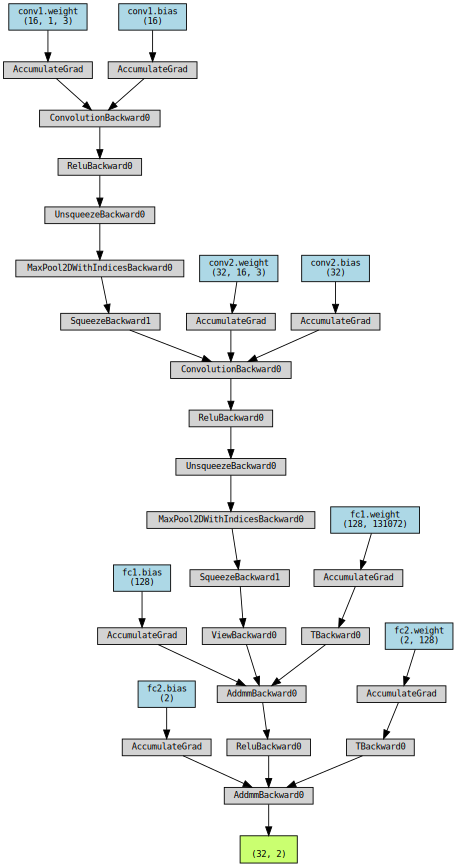

In [6]:
!pip install torchviz
import torchviz

# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model(images), params=dict(model.named_parameters()))

In [8]:
import random # import the random module


# Seed for Python's built-in random module
random.seed(18014519)
# Seed for NumPy
np.random.seed(18014519)
# Seed for PyTorch CPU operations
torch.manual_seed(18014519)


transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])


root_dir = '/content/drive/MyDrive/SPC_Charts'


full_dataset = datasets.ImageFolder(root=root_dir, transform=transform)


train_size = int(0.4 * len(full_dataset))  # 40% for training
test_size = len(full_dataset) - train_size  # 60% for testing

# Perform the train-test split
train_dataset, test_dataset = random_split(full_dataset, [train_size, test_size])


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)


class ControlChartCNN(nn.Module):
    def __init__(self, num_classes=2):
        super(ControlChartCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 32 * 32, 128)
        self.fc2 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model2 = ControlChartCNN(num_classes=2).to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.001)


num_epochs = 5
for epoch in range(num_epochs):
    model2.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model2(images)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

print("Training complete.")


model_eval= model2.eval()
all_labels = []
all_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)


        outputs = model2(images)
        _, preds = torch.max(outputs, 1)

        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(preds.cpu().numpy())


accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')
f1 = f1_score(all_labels, all_preds, average='weighted')
conf_matrix = confusion_matrix(all_labels, all_preds)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print("Confusion Matrix:")
print(conf_matrix)


Epoch [1/5], Loss: 0.7384
Epoch [2/5], Loss: 0.0298
Epoch [3/5], Loss: 0.0340
Epoch [4/5], Loss: 0.0263
Epoch [5/5], Loss: 0.0215
Training complete.
Accuracy: 0.9886
Precision: 0.9888
Recall: 0.9886
F1 Score: 0.9886
Confusion Matrix:
[[636   2]
 [ 13 668]]


In [ ]:


# Assuming 'model' is your trained ControlChartCNN model
# and 'images' is a sample input tensor from your test_loader

# Get a sample input
images, labels = next(iter(test_loader))
images = images.to(device)

# Create the visualization
torchviz.make_dot(model2(images), params=dict(model2.named_parameters()))